<a href="https://colab.research.google.com/github/Krishna737Sharma/Implementation-of-Perceptron-Algorithm/blob/main/assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm

# **Question 1**

In [3]:
digits= load_digits()
X,y = digits.data, digits.target

In [4]:
print(X.shape)
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


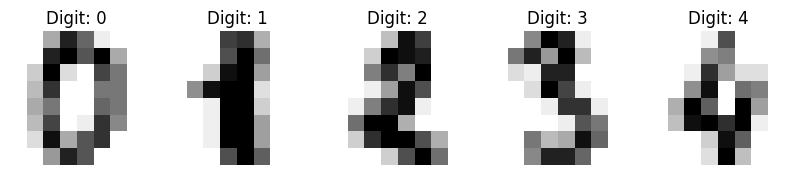

In [5]:
# Visualize some digits
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap='binary')
    plt.title(f'Digit: {y[i]}')
    plt.axis('off')
plt.show()

In [6]:
print(np.array(digits.images.shape))
print(digits.images)

[1797    8    8]
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0. 

# **Question 2**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features have been standardized to mean=0 and std=1")

Features have been standardized to mean=0 and std=1


In [9]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


# **Question 3**

In [10]:
# In this model i used the concept of one vs all

class custom_perceptron:
    def __init__(self, num_features, num_classes, learning_rate=0.01):
        self.num_classes = num_classes
        self.classifiers = []
        for _ in range(num_classes):
            weights = np.zeros(num_features + 1)
            self.classifiers.append(weights)  # initialise the weight vector for each class
        self.lr = learning_rate

    def add_bias(self, X):
        return np.hstack((X, np.ones((X.shape[0], 1))))  # horizontally stacks arrays of bias

    def activation_function(self, X, weights):
        X_bias = self.add_bias(X)
        return np.where(X_bias @ weights >= 0, 1, 0)

    def fit(self, X, y, max_epochs=100, early_stopping_patience=5):
        X_bias = self.add_bias(X)
        misclassified_history = {i: [] for i in range(self.num_classes)}
        convergence_epochs = {}

        print("\nTraining perceptrons for each digit:")
        for class_idx in tqdm(range(self.num_classes)):
            classifier_num= class_idx+1     # use for count the total number of classifier needed
            print(f"\n\nTraining perceptron {classifier_num} for digit {class_idx}")
            binary_y = np.where(y == class_idx, 1, 0)  # binary classify the multiple class into two class
            weights = self.classifiers[class_idx]

            best_misclassified = float('inf')
            patience_counter = 0

            for epoch in range(max_epochs):
                predictions = self.activation_function(X, weights)
                misclassified = np.sum(predictions != binary_y)
                misclassified_history[class_idx].append(misclassified)

                # Print misclassification count for this class at each epoch
                print(f"Class {class_idx} - Epoch {epoch + 1} - Misclassified: {misclassified}")

                # Check for improvement
                if misclassified < best_misclassified:
                    best_misclassified = misclassified
                    patience_counter = 0
                else:
                    patience_counter += 1

                # Early stopping
                if patience_counter >= early_stopping_patience or misclassified == 0:   # early stopping use to atleast 5 time check misclassification
                    convergence_epochs[class_idx] = epoch + 1
                    print(f"Class {class_idx} converged at epoch {epoch + 1} with {misclassified} misclassified samples.")
                    break

                # If we reach max_epochs, record it as the convergence epoch
                if epoch == max_epochs - 1:
                    convergence_epochs[class_idx] = max_epochs
                    print(f"Class {class_idx} did not converge early. Training completed after {max_epochs} epochs.")

                # Update weights
                for i in range(len(X)):
                    if predictions[i] != binary_y[i]:
                        error = binary_y[i] - predictions[i]
                        weights += self.lr * error * X_bias[i]

            self.classifiers[class_idx] = weights

        return misclassified_history, convergence_epochs,classifier_num

    def predict(self, X):
        X_bias = self.add_bias(X)
        scores = np.array([X_bias @ weights for weights in self.classifiers]).T
        predictions = np.argmax(scores, axis=1)
        return predictions

    def quick_check(self, X, y):
        predictions = self.predict(X)
        print("\nQuick Check for First 5 Samples:")
        for i in range(min(5, len(y))):
            true_label = y[i]
            predicted_label = predictions[i]
            is_correct = "Correct" if true_label == predicted_label else "Incorrect"
            print(f"Sample {i + 1}: True Label = {true_label}, Predicted Label = {predicted_label} -> {is_correct}")


In [11]:
# Train the perceptron
model = custom_perceptron(num_features=X_train.shape[1], num_classes=10, learning_rate=0.01)
misclassified_history, convergence_epochs,classifier_count = model.fit(X_train, y_train)


Training perceptrons for each digit:


  0%|          | 0/10 [00:00<?, ?it/s]



Training perceptron 1 for digit 0
Class 0 - Epoch 1 - Misclassified: 1292
Class 0 - Epoch 2 - Misclassified: 97
Class 0 - Epoch 3 - Misclassified: 16
Class 0 - Epoch 4 - Misclassified: 6
Class 0 - Epoch 5 - Misclassified: 2
Class 0 - Epoch 6 - Misclassified: 2
Class 0 - Epoch 7 - Misclassified: 2
Class 0 - Epoch 8 - Misclassified: 2
Class 0 - Epoch 9 - Misclassified: 1
Class 0 - Epoch 10 - Misclassified: 1
Class 0 - Epoch 11 - Misclassified: 1
Class 0 - Epoch 12 - Misclassified: 1
Class 0 - Epoch 13 - Misclassified: 1
Class 0 - Epoch 14 - Misclassified: 1
Class 0 converged at epoch 14 with 1 misclassified samples.


Training perceptron 2 for digit 1
Class 1 - Epoch 1 - Misclassified: 1283
Class 1 - Epoch 2 - Misclassified: 84
Class 1 - Epoch 3 - Misclassified: 47
Class 1 - Epoch 4 - Misclassified: 38
Class 1 - Epoch 5 - Misclassified: 30
Class 1 - Epoch 6 - Misclassified: 27
Class 1 - Epoch 7 - Misclassified: 23
Class 1 - Epoch 8 - Misclassified: 23
Class 1 - Epoch 9 - Misclassified:

 20%|██        | 2/10 [00:00<00:00, 13.51it/s]



Training perceptron 3 for digit 2
Class 2 - Epoch 1 - Misclassified: 1293
Class 2 - Epoch 2 - Misclassified: 107
Class 2 - Epoch 3 - Misclassified: 23
Class 2 - Epoch 4 - Misclassified: 13
Class 2 - Epoch 5 - Misclassified: 7
Class 2 - Epoch 6 - Misclassified: 4
Class 2 - Epoch 7 - Misclassified: 4
Class 2 - Epoch 8 - Misclassified: 2
Class 2 - Epoch 9 - Misclassified: 2
Class 2 - Epoch 10 - Misclassified: 0
Class 2 converged at epoch 10 with 0 misclassified samples.


Training perceptron 4 for digit 3
Class 3 - Epoch 1 - Misclassified: 1288
Class 3 - Epoch 2 - Misclassified: 122
Class 3 - Epoch 3 - Misclassified: 90
Class 3 - Epoch 4 - Misclassified: 55
Class 3 - Epoch 5 - Misclassified: 25
Class 3 - Epoch 6 - Misclassified: 26
Class 3 - Epoch 7 - Misclassified: 24
Class 3 - Epoch 8 - Misclassified: 22
Class 3 - Epoch 9 - Misclassified: 21
Class 3 - Epoch 10 - Misclassified: 22
Class 3 - Epoch 11 - Misclassified: 20
Class 3 - Epoch 12 - Misclassified: 19
Class 3 - Epoch 13 - Misclas

 40%|████      | 4/10 [00:00<00:00, 12.08it/s]

Class 3 - Epoch 19 - Misclassified: 20
Class 3 - Epoch 20 - Misclassified: 18
Class 3 - Epoch 21 - Misclassified: 18
Class 3 converged at epoch 21 with 18 misclassified samples.


Training perceptron 5 for digit 4
Class 4 - Epoch 1 - Misclassified: 1302
Class 4 - Epoch 2 - Misclassified: 107
Class 4 - Epoch 3 - Misclassified: 15
Class 4 - Epoch 4 - Misclassified: 9
Class 4 - Epoch 5 - Misclassified: 8
Class 4 - Epoch 6 - Misclassified: 9
Class 4 - Epoch 7 - Misclassified: 7
Class 4 - Epoch 8 - Misclassified: 9
Class 4 - Epoch 9 - Misclassified: 5
Class 4 - Epoch 10 - Misclassified: 5
Class 4 - Epoch 11 - Misclassified: 5
Class 4 - Epoch 12 - Misclassified: 7
Class 4 - Epoch 13 - Misclassified: 4
Class 4 - Epoch 14 - Misclassified: 6
Class 4 - Epoch 15 - Misclassified: 3
Class 4 - Epoch 16 - Misclassified: 5
Class 4 - Epoch 17 - Misclassified: 2
Class 4 - Epoch 18 - Misclassified: 2
Class 4 - Epoch 19 - Misclassified: 2
Class 4 - Epoch 20 - Misclassified: 0
Class 4 converged at epoch 20

 60%|██████    | 6/10 [00:00<00:00, 11.09it/s]

Class 5 - Epoch 13 - Misclassified: 5
Class 5 - Epoch 14 - Misclassified: 5
Class 5 converged at epoch 14 with 5 misclassified samples.


Training perceptron 7 for digit 6
Class 6 - Epoch 1 - Misclassified: 1291
Class 6 - Epoch 2 - Misclassified: 92
Class 6 - Epoch 3 - Misclassified: 20
Class 6 - Epoch 4 - Misclassified: 12
Class 6 - Epoch 5 - Misclassified: 11
Class 6 - Epoch 6 - Misclassified: 9
Class 6 - Epoch 7 - Misclassified: 9
Class 6 - Epoch 8 - Misclassified: 5
Class 6 - Epoch 9 - Misclassified: 6
Class 6 - Epoch 10 - Misclassified: 7
Class 6 - Epoch 11 - Misclassified: 5
Class 6 - Epoch 12 - Misclassified: 5
Class 6 - Epoch 13 - Misclassified: 6
Class 6 converged at epoch 13 with 6 misclassified samples.


Training perceptron 8 for digit 7
Class 7 - Epoch 1 - Misclassified: 1292
Class 7 - Epoch 2 - Misclassified: 74
Class 7 - Epoch 3 - Misclassified: 15
Class 7 - Epoch 4 - Misclassified: 11
Class 7 - Epoch 5 - Misclassified: 11
Class 7 - Epoch 6 - Misclassified: 12
Class 7 - 

 80%|████████  | 8/10 [00:00<00:00,  9.43it/s]

Class 7 - Epoch 27 - Misclassified: 5
Class 7 - Epoch 28 - Misclassified: 5
Class 7 converged at epoch 28 with 5 misclassified samples.


Training perceptron 9 for digit 8
Class 8 - Epoch 1 - Misclassified: 1293


 90%|█████████ | 9/10 [00:00<00:00,  9.14it/s]

Class 8 - Epoch 2 - Misclassified: 136
Class 8 - Epoch 3 - Misclassified: 123
Class 8 - Epoch 4 - Misclassified: 81
Class 8 - Epoch 5 - Misclassified: 61
Class 8 - Epoch 6 - Misclassified: 52
Class 8 - Epoch 7 - Misclassified: 57
Class 8 - Epoch 8 - Misclassified: 48
Class 8 - Epoch 9 - Misclassified: 62
Class 8 - Epoch 10 - Misclassified: 49
Class 8 - Epoch 11 - Misclassified: 60
Class 8 - Epoch 12 - Misclassified: 51
Class 8 - Epoch 13 - Misclassified: 51
Class 8 converged at epoch 13 with 51 misclassified samples.


Training perceptron 10 for digit 9
Class 9 - Epoch 1 - Misclassified: 1297
Class 9 - Epoch 2 - Misclassified: 90
Class 9 - Epoch 3 - Misclassified: 88
Class 9 - Epoch 4 - Misclassified: 71
Class 9 - Epoch 5 - Misclassified: 46


100%|██████████| 10/10 [00:01<00:00,  8.94it/s]

Class 9 - Epoch 6 - Misclassified: 35
Class 9 - Epoch 7 - Misclassified: 29
Class 9 - Epoch 8 - Misclassified: 22
Class 9 - Epoch 9 - Misclassified: 22
Class 9 - Epoch 10 - Misclassified: 17
Class 9 - Epoch 11 - Misclassified: 15
Class 9 - Epoch 12 - Misclassified: 14
Class 9 - Epoch 13 - Misclassified: 15
Class 9 - Epoch 14 - Misclassified: 14
Class 9 - Epoch 15 - Misclassified: 16
Class 9 - Epoch 16 - Misclassified: 11
Class 9 - Epoch 17 - Misclassified: 12
Class 9 - Epoch 18 - Misclassified: 13
Class 9 - Epoch 19 - Misclassified: 20
Class 9 - Epoch 20 - Misclassified: 19
Class 9 - Epoch 21 - Misclassified: 12
Class 9 converged at epoch 21 with 12 misclassified samples.


100%|██████████| 10/10 [00:01<00:00,  9.67it/s]


In [12]:
# Use the quick check function
model.quick_check(X_test, y_test)


Quick Check for First 5 Samples:
Sample 1: True Label = 6, Predicted Label = 6 -> Correct
Sample 2: True Label = 9, Predicted Label = 9 -> Correct
Sample 3: True Label = 3, Predicted Label = 3 -> Correct
Sample 4: True Label = 7, Predicted Label = 7 -> Correct
Sample 5: True Label = 2, Predicted Label = 2 -> Correct


# **Question 4**

In [13]:
print(f"Number of perceptrons needed: {classifier_count} (one for each digit)")

Number of perceptrons needed: 10 (one for each digit)


# **Question 5**

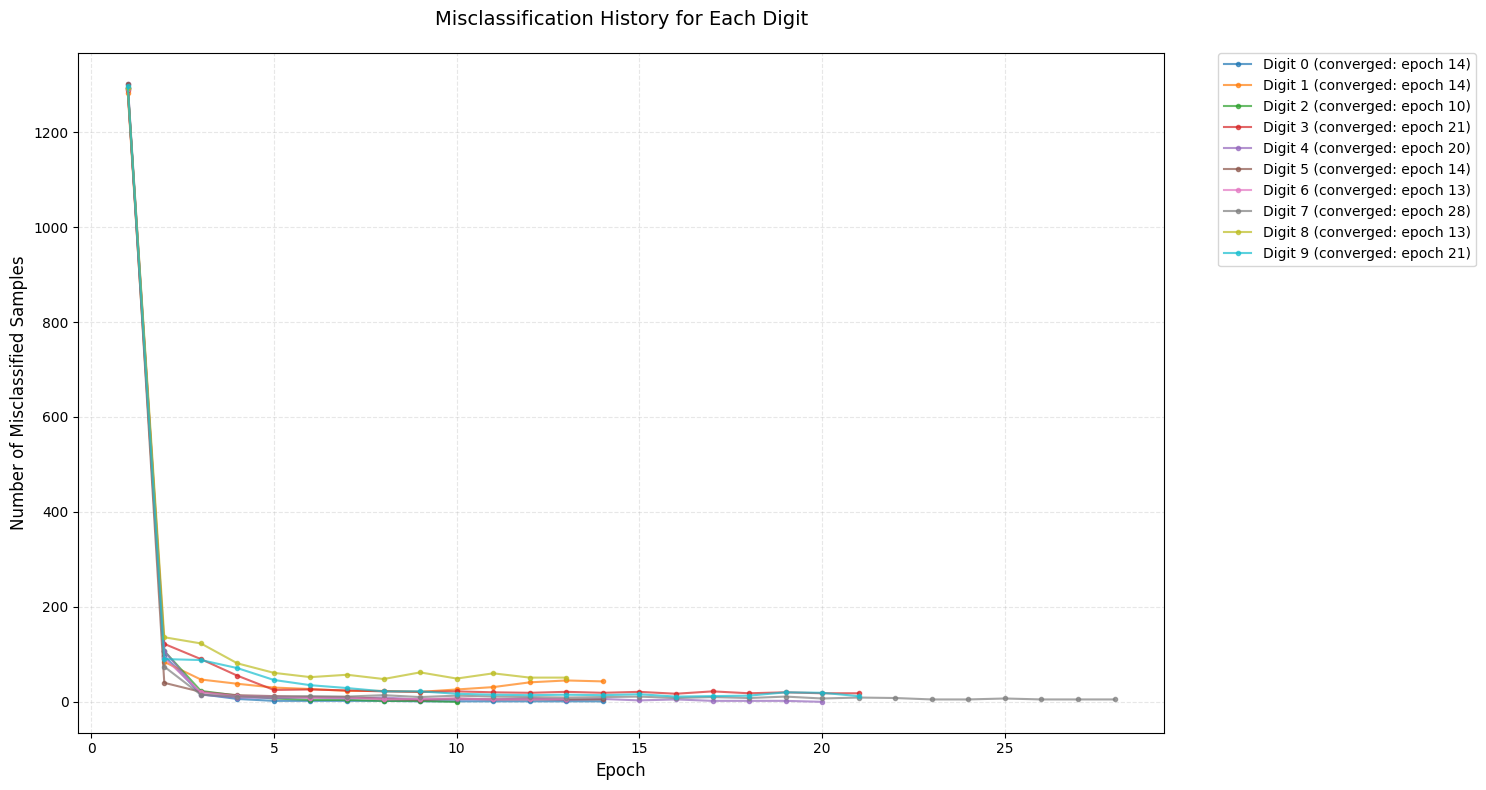

In [14]:
# Plot misclassification history with improved visualization
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Get 10 distinct colors

for class_idx in range(10):
    epochs = convergence_epochs[class_idx]
    history = misclassified_history[class_idx]

    plt.plot(range(1, len(history) + 1),
             history,
             label=f'Digit {class_idx} (converged: epoch {epochs})',
             color=colors[class_idx],
             marker='o',
             markersize=3,
             alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Number of Misclassified Samples', fontsize=12)
plt.title('Misclassification History for Each Digit', fontsize=14, pad=20)

# Improve legend placement and readability
plt.legend(bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0.,
          frameon=True,
          fontsize=10)

# Add grid and adjust layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

# **Question 6**

Custom Implementation Metrics:
Accuracy: 0.9583
Precision: 0.9592
Recall: 0.9569


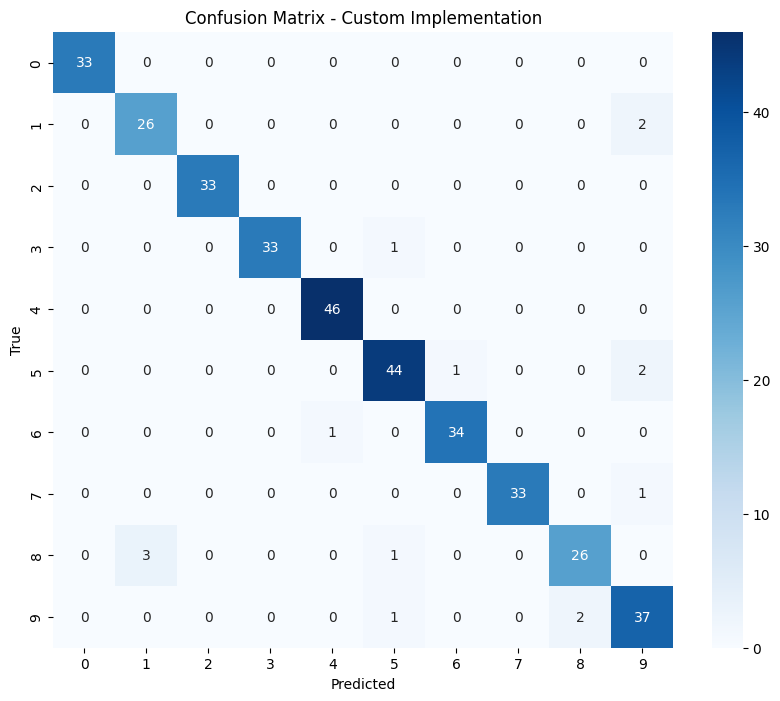

In [15]:
# Generate predictions and detailed metrics
y_pred = model.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred)
custom_precision = precision_score(y_test, y_pred, average='macro')
custom_recall = recall_score(y_test, y_pred, average='macro')

print("Custom Implementation Metrics:")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall: {custom_recall:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Custom Implementation')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Question 7**

Scikit-learn Implementation Metrics:
Accuracy: 0.9556
Precision: 0.9552
Recall: 0.9547


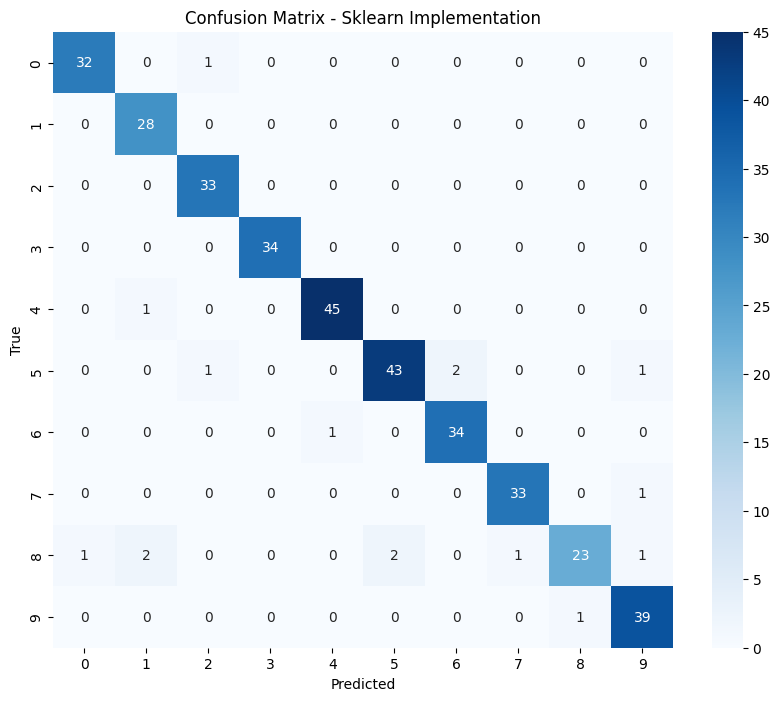

In [16]:
# Compare with sklearn implementation
skl_perceptron = Perceptron(random_state=42)
skl_perceptron.fit(X_train, y_train)
skl_pred = skl_perceptron.predict(X_test)

skl_accuracy = accuracy_score(y_test, skl_pred)
skl_precision = precision_score(y_test, skl_pred, average='macro')
skl_recall = recall_score(y_test, skl_pred, average='macro')

print("Scikit-learn Implementation Metrics:")
print(f"Accuracy: {skl_accuracy:.4f}")
print(f"Precision: {skl_precision:.4f}")
print(f"Recall: {skl_recall:.4f}")

# Plot confusion matrix for sklearn
plt.figure(figsize=(10, 8))
cm_skl = confusion_matrix(y_test, skl_pred)
sns.heatmap(cm_skl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Sklearn Implementation')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Question 8**

In [17]:
# Separability Analysis
print("Separability Analysis:")
print(f"1. Best performing digit: {np.argmax([np.max(misclassified_history[i]) for i in range(10)])}")
print(f"2. Most challenging digit: {np.argmin([np.max(misclassified_history[i]) for i in range(10)])}")
print(f"3. Average convergence epoch: {np.mean(list(convergence_epochs.values())):.1f}")
print("\nConclusions:")
print("1. Dataset is not perfectly linearly separable (accuracy < 100%)")
print(f"2. Custom implementation achieved {custom_accuracy:.1%} accuracy")
print(f"3. Sklearn implementation achieved {skl_accuracy:.1%} accuracy")
print("4. Some digits are more easily separable than others (visible in confusion matrix)")

Separability Analysis:
1. Best performing digit: 4
2. Most challenging digit: 1
3. Average convergence epoch: 16.8

Conclusions:
1. Dataset is not perfectly linearly separable (accuracy < 100%)
2. Custom implementation achieved 95.8% accuracy
3. Sklearn implementation achieved 95.6% accuracy
4. Some digits are more easily separable than others (visible in confusion matrix)
